<a href="https://colab.research.google.com/github/noora20FH/PCVK/blob/main/FINAL_Leaf_classification_PCVK_Noora_Aulia_Hidayat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing some useful/necessary packages
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score, GridSearchCV

from sklearn.metrics import accuracy_score, log_loss

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, log_loss
import numpy as np




import cv2

%matplotlib inline

#Machine learning classifiers

#ANOTHER WAY

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Define the path to the CSV file
csv_file = '/content/drive/MyDrive/Leaf_Images/label.csv'
image_dir = '/content/drive/MyDrive/Leaf_Images/'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file)

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print(f"Training set shape: {train_df.shape}")
print(f"Testing set shape: {test_df.shape}")

Training set shape: (24, 2)
Testing set shape: (6, 2)


In [6]:
# Display the data in train_df
print("Leaves Images:")
df

Leaves Images:


,id,species
0,201,Acer_Capillipes
1,227,Acer_Capillipes
2,498,Acer_Capillipes
3,569,Acer_Capillipes
4,610,Acer_Capillipes
5,990,Acer_Capillipes
6,1196,Acer_Capillipes
7,1377,Acer_Capillipes
8,1525,Acer_Capillipes
9,1562,Acer_Capillipes


In [7]:
# Display the data in train_df
print("Train DataFrame:")
print(train_df)


Train DataFrame:
      id          species
28  1296  Castanea_Sativa
24  1087  Castanea_Sativa
12   166  Acer_Circinatum
0    201  Acer_Capillipes
4    610  Acer_Capillipes
16   962  Acer_Circinatum
5    990  Acer_Capillipes
13   235  Acer_Circinatum
11   164  Acer_Circinatum
22   769  Castanea_Sativa
1    227  Acer_Capillipes
2    498  Acer_Capillipes
25  1153  Castanea_Sativa
3    569  Acer_Capillipes
21   592  Castanea_Sativa
26  1229  Castanea_Sativa
18  1019  Acer_Circinatum
29  1511  Castanea_Sativa
20   425  Castanea_Sativa
7   1377  Acer_Capillipes
10   160  Acer_Circinatum
14   268  Acer_Circinatum
19  1506  Acer_Circinatum
6   1196  Acer_Capillipes


In [8]:
# Display the data in test_df
print("Test DataFrame:")
print(test_df)


Test DataFrame:
      id          species
27  1273  Castanea_Sativa
15   496  Acer_Circinatum
23   926  Castanea_Sativa
17  1000  Acer_Circinatum
8   1525  Acer_Capillipes
9   1562  Acer_Capillipes


In [9]:
#print type(train_raw), type(test_raw)
print ('There are {}'.format(train_df.shape[0]), \
       'samples for building the machine learning model and {}'.format(test_df.shape[0]), \
       'samples for evaluating your model via Kaggle.')

There are 24 samples for building the machine learning model and 6 samples for evaluating your model via Kaggle.


In [ ]:
train_df.head(5)

,id,species
28,1296,Castanea_Sativa
24,1087,Castanea_Sativa
12,166,Acer_Circinatum
0,201,Acer_Capillipes
4,610,Acer_Capillipes


#Data Preprocessing

In [10]:
# Preprocess the data to fit the classifier
le = LabelEncoder().fit(train_df.species)  # Instantiate a LabelEncoder and fit it to the species labels
labels = le.transform(train_df.species)  # Encode species strings and return labels with values between 0 and n_classes-1
classes = list(le.classes_)  # Save the species



In [11]:
# Double check the data
print ("The shapes of train and labels are: ", train_df.shape, labels.shape)
print ("There are {} species in total.".format(len(classes)) )
print ("The shapes of test and test_ids are: ", test_df.shape, test_df.id.shape)

The shapes of train and labels are:  (24, 2) (24,)
There are 3 species in total.
The shapes of test and test_ids are:  (6, 2) (6,)


####Split the 'train' data for cross-validation

In [12]:
# Construct the iterator
ss_split = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
ss_split.get_n_splits(train_df, labels)

for train_index, test_index in ss_split.split(train_df, labels):
    X_train, X_test = train_df.id.iloc[train_index], train_df.id.iloc[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

In [13]:
# Double check the data
print (y_train.shape, y_test.shape)

(19,) (5,)


##functions to visualize the images

In [33]:
import os

def leaf_image(image_id, target_length=160):
    """
    `image_id` should be the index of the image in the Leaf_Images/ folder

    Return the image of a given id (1~1584) with the target size (target_length x target_length)
    """

    image_name = str(image_id) + '.jpg'
    image_path = os.path.join('/content/drive/MyDrive/Leaf_Images', image_name)

    leaf_img = plt.imread(image_path)  # Reading in the image
    leaf_img_width = leaf_img.shape[1]
    leaf_img_height = leaf_img.shape[0]

    img_target = np.zeros((target_length, target_length), np.uint8)

    if leaf_img_width >= leaf_img_height:
        scale_img_width = target_length
        scale_img_height = int((float(scale_img_width) / leaf_img_width) * leaf_img_height)
        img_scaled = cv2.resize(leaf_img, (scale_img_width, scale_img_height), interpolation=cv2.INTER_AREA)
        copy_location = (target_length - scale_img_height) // 2
        img_target[copy_location:copy_location + scale_img_height, :] = img_scaled
    else:
        scale_img_height = target_length
        scale_img_width = int((float(scale_img_height) / leaf_img_height) * leaf_img_width)
        img_scaled = cv2.resize(leaf_img, (scale_img_width, scale_img_height), interpolation=cv2.INTER_AREA)
        copy_location = (target_length - scale_img_width) // 2
        img_target[:, copy_location:copy_location + scale_img_width] = img_scaled

    return img_target


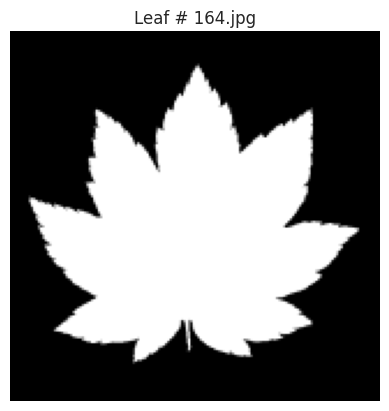

In [34]:
# Test the leaf_image function
leaf_id = 164
leaf_img = leaf_image(leaf_id, target_length=160);

plt.imshow(leaf_img, cmap='gray'); plt.title('Leaf # '+str(leaf_id)+ '.jpg'); plt.axis('off'); plt.show()

In [35]:
import numpy as np
import cv2

def species_image(species):
    """
    `species` should be the index or species name

    Returns an image of a certain labeled species
    """

    leaf_image_length = 160
    img_target = 240 * np.ones([leaf_image_length, leaf_image_length*2], np.uint8)  # Initialization
    label_info = ''

    if isinstance(species, int) and species >= 0 and species < 99:
        images_index = np.where(labels == species)[0]
        label_info = str(species) + '-' + train_df.species.iloc[images_index[0]]
    elif isinstance(species, str) and species in classes:
        images_index = np.where(train_df.species == species)[0]
        label_info = str(images_index[0]) + '-' + species
    else:
        print('Error: Please input a valid index or species name')
        return

    for image_index in images_index:
        image_id = train_df.id.iloc[image_index]
        leaf_img = leaf_image(image_id)
        img_target = np.append(img_target, leaf_img, axis=1)

    # Add information onto the first block
    cv2.putText(img_target, label_info, (10, 90), cv2.FONT_HERSHEY_COMPLEX, 0.8, (100, 170, 0), 2)

    return img_target, label_info



#     Using the iloc accessor to access DataFrame values based on integer location.
# Checking the species parameter using isinstance to ensure it is of the correct type.
# Replacing train_df.species[images_index[0]] with train_df.species.iloc[images_index[0]] to access the species value correctly


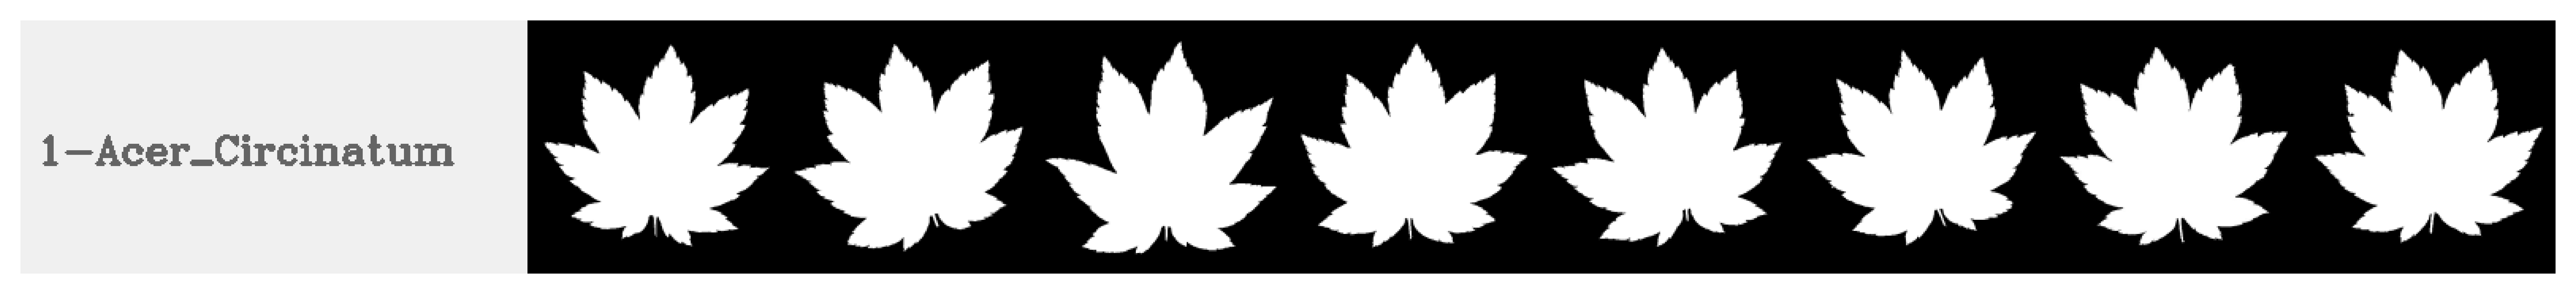

1-Acer_Circinatum


In [36]:
# Test the function
species_img, label_info = species_image(1)  # Show this species of given index(0~2)
fig = plt.figure(num=None, figsize=(16, 3), dpi=1200, facecolor='w', edgecolor='w',frameon=False,linewidth = 0)
plt.imshow(species_img, cmap='gray'); plt.axis('off'); plt.show()
print (label_info)
#cv2.imwrite('species/'+label_info+'.jpg', species_img)  # Save the species image


In [37]:
def visualize_error(train_predictions, y_test):
    """
    Review the images where mistakes occur

    """

    error_indices = np.where(train_predictions != y_test)[0]; print ('The error indices: ', error_indices)
    for err_index in error_indices[0:]:
        print ('Error index in the test set: '), err_index

        err_img_index = train_df.id[test_index[err_index]]

        print ('Ground truth species index: {}'.format(y_test[err_index]))
        print ('Wrong predicting species index: {}'.format(train_predictions[err_index]))


        plt.imshow(leaf_image(err_img_index, 160), cmap='gray'); plt.axis('off'); plt.show()

        wrong_pred_species_img, label_info = species_image(train_predictions[err_index])
        fig = plt.figure(num=None, figsize=(16, 3), dpi=1200, facecolor='w', edgecolor='w',frameon=False,linewidth = 0)
        wrong_pred_species_img = cv2.cvtColor(wrong_pred_species_img,cv2.COLOR_GRAY2RGB)
        wrong_pred_species_img = cv2.copyMakeBorder(wrong_pred_species_img,10,10,10,10,cv2.BORDER_CONSTANT,value=[255,0,0])

        plt.imshow(wrong_pred_species_img, cmap='gray'); plt.axis('off'); plt.show()

        ground_truth_species_img, label_info = species_image(y_test[err_index])
        fig = plt.figure(num=None, figsize=(16, 3), dpi=1200, facecolor='w', edgecolor='w',frameon=False,linewidth = 0)
        plt.imshow(ground_truth_species_img, cmap='gray'); plt.axis('off'); plt.show()

        print ('#'*50)

In [38]:
# List and save all the classes
for i, class_ in enumerate(classes):
    species_img, label_info = species_image(i)  # Show this species of given index(0~98)
    print (label_info)
    cv2.imwrite('species/'+label_info+'.jpg', species_img)

0-Acer_Capillipes
1-Acer_Circinatum
2-Castanea_Sativa


##Machine Learning

###Naive Bayes

In [39]:

clf = GaussianNB()
# the image IDs are used as features, and we reshape them using .values.reshape(-1, 1) to ensure that they have the required shape for the classifier.
clf.fit(X_train.values.reshape(-1, 1), y_train)  # Fit the classifier to the training data
print('ML Model:', clf.__class__.__name__)

# Cross-validation
scores = cross_val_score(GaussianNB(), train_df.id.values.reshape(-1, 1), labels, cv=ss_split)
# print('Mean Cross-validation scores: {}'.format(np.mean(scores)))

train_predictions = clf.predict(X_test.values.reshape(-1, 1))
acc = accuracy_score(y_test, train_predictions)
print('Accuracy: {:.4%}'.format(acc))

train_predictions = clf.predict_proba(X_test.values.reshape(-1, 1))
ll = log_loss(y_test, train_predictions)
print('Log Loss: {:.6}'.format(ll))


ML Model: GaussianNB
Accuracy: 40.0000%
Log Loss: 1.37747


In [40]:
print('X_train shape:', X_train.shape)

X_train shape: (19,)


###Linear Discriminant Analysis

In [41]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train.values.reshape(-1, 1), y_train)
print ('ML Model: ', clf.__class__.__name__)

train_predictions = clf.predict(X_test.values.reshape(-1, 1))
acc = accuracy_score(y_test, train_predictions)
print ('Accuracy: {:.4%}'.format(acc))

train_predictions = clf.predict_proba(X_test.values.reshape(-1, 1))
ll = log_loss(y_test, train_predictions)
print ('Log Loss: {:.6}'.format(ll))

ML Model:  LinearDiscriminantAnalysis
Accuracy: 40.0000%
Log Loss: 1.08191


###Logistic Regression

In [49]:
def visualize_error1(train_predictions, y_test):
    error_indices = np.where(train_predictions != y_test)[0]
    print('The error indices: ', error_indices)

    for err_index in error_indices[0:]:
        print('Error index in the test set: ', err_index)

        err_img_index = train_df.id[test_index[err_index]]

        print('Ground truth species index: {}'.format(y_test[err_index]))
        print('Wrong predicting species index: {}'.format(train_predictions[err_index]))

        plt.imshow(leaf_image(err_img_index, 160), cmap='gray')
        plt.axis('off')
        plt.show()

        wrong_pred_species_img, label_info = species_image(train_predictions[err_index])
        if wrong_pred_species_img is not None:  # Skip if species_image returns None
            fig = plt.figure(num=None, figsize=(16, 3), dpi=1200, facecolor='w', edgecolor='w', frameon=False, linewidth=0)
            wrong_pred_species_img = cv2.cvtColor(wrong_pred_species_img, cv2.COLOR_GRAY2RGB)
            wrong_pred_species_img = cv2.copyMakeBorder(wrong_pred_species_img, 10, 10, 10, 10, cv2.BORDER_CONSTANT, value=[255, 0, 0])

            plt.imshow(wrong_pred_species_img, cmap='gray')
            plt.axis('off')
            plt.show()

        ground_truth_species_img, label_info = species_image(y_test[err_index])
        if ground_truth_species_img is not None:  # Skip if species_image returns None
            fig = plt.figure(num=None, figsize=(16, 3), dpi=1200, facecolor='w', edgecolor='w', frameon=False, linewidth=0)
            plt.imshow(ground_truth_species_img, cmap='gray')
            plt.axis('off')
            plt.show()

        print('#' * 50)


In [50]:
# Standardize the training data.
scaler = StandardScaler().fit(X_train.values.reshape(-1, 1))
X_train_scaled = scaler.transform(X_train.values.reshape(-1, 1))

param_grid = {'C': [1000, 10000],
              'tol': [0.000001, 0.00001]}
log_reg = LogisticRegression(solver='newton-cg', multi_class='multinomial')
grid_search = GridSearchCV(log_reg, param_grid, scoring='neg_log_loss', refit=True, n_jobs=1, cv=ss_split)
grid_search.fit(X_train_scaled, y_train)

print('Best parameter: {}'.format(grid_search.best_params_))
print('Best cross-validation neg_log_loss score: {}'.format(grid_search.best_score_))
print('\nBest estimator:\n{}'.format(grid_search.best_estimator_))

scaler = StandardScaler().fit(X_test.values.reshape(-1, 1))
X_test_scaled = scaler.transform(X_test.values.reshape(-1, 1))

print('ML Model: Logistic Regression')
# Accuracy
train_predictions = grid_search.predict(X_test_scaled)
acc = accuracy_score(y_test, train_predictions)
print('Accuracy: {:.4%}'.format(acc))
# Logloss
train_predictions_p = grid_search.predict_proba(X_test_scaled)
ll = log_loss(y_test, train_predictions_p)
print('Log Loss: {:.6}'.format(ll))




Best parameter: {'C': 1000, 'tol': 1e-06}
Best cross-validation neg_log_loss score: -1.3439873182800661

Best estimator:
LogisticRegression(C=1000, multi_class='multinomial', solver='newton-cg',
                   tol=1e-06)
ML Model: Logistic Regression
Accuracy: 40.0000%
Log Loss: 1.07674


The error indices:  [0 3 4]
Error index in the test set:  0
Ground truth species index: 2
Wrong predicting species index: 0


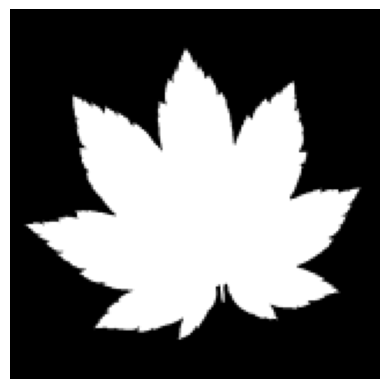

Error: Please input a valid index or species name


TypeError: ignored

In [51]:
visualize_error1(train_predictions, y_test)